In [31]:
import sys
import os
import time
from datetime import datetime

sys.path.append("..")
# 自分のpath
os.chdir("/home/nakamura/HAI/main_server/hai")

import pymongo
from PIL import Image
from matplotlib import pylab as plt
from matplotlib.animation import ArtistAnimation
import matplotlib.animation as animation
import numpy as np
from bson.objectid import ObjectId
from sklearn.decomposition import PCA

from _app import app
from database import mongo
from notebooks.utils.utils import visualize, display_latest_image, display_image, print_time, strtime_to_epoch, epoch_to_strtime, pair_images
from controllers.learner.img2vec import NNFeatures
import controllers.learner.datasets as ds

In [2]:
app.config['PORT_DB']

20202

In [3]:
nn = NNFeatures()

In [4]:
prints = mongo.print.find({"user_name": "koki", 'time': {"$gt": 1509675690.059450}, 
                           "$or": [{"text": "play"}, {"text": 'study'}, {'text': 'sleep'}, {'text': 'stop'}]}, sort=[("_id", pymongo.ASCENDING)])
prints = list(prints)

In [84]:
prints

[{'_id': ObjectId('59fbd2aa1d41c82c66cc152b'),
  'text': 'play',
  'time': 1509675690.0594504,
  'user_name': 'koki'},
 {'_id': ObjectId('59fbd4f31d41c82c66cc1772'),
  'text': 'study',
  'time': 1509676275.6991415,
  'user_name': 'koki'},
 {'_id': ObjectId('59fbd6d01d41c82c66cc18a0'),
  'text': 'sleep',
  'time': 1509676752.4782422,
  'user_name': 'koki'},
 {'_id': ObjectId('59fbd7d91d41c82c66cc18fa'),
  'text': 'stop',
  'time': 1509677017.0670786,
  'user_name': 'koki'}]

In [5]:
st = prints[0]['time'] - 0.1
et = prints[-1]['time'] + 0.1

images0 = mongo.images.find({'time': {"$gt": st, "$lt": et}, "cam_id": "webcam0"}, sort=[("_id", pymongo.ASCENDING)])
# images1 = mongo.images.find({'time': {"$gt": st, "$lt": et}, "cam_id": "webcam1"}, sort=[("_id", pymongo.ASCENDING)])

In [6]:
data = pair_images(images0)

In [7]:
labels = []
for im0, im1 in data:
    for l in range(len(prints) - 1):
        if prints[l+1]['time'] >= im0['time']:
            labels.append(l)
            break

In [86]:
np.array(labels)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [8]:
len(data)

363

In [23]:
X = list()
for d0, d1 in data:
    input_image = list()
    input_image.append(Image.open(app.config['RAW_IMG_DIR'] + d0['filename']))
    input_image.append(Image.open(app.config['RAW_IMG_DIR'] + d1['filename']))
    features = nn.img2vec(input_image)
    X.append(np.concatenate((features[0], features[1])))

Y = labels

0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2


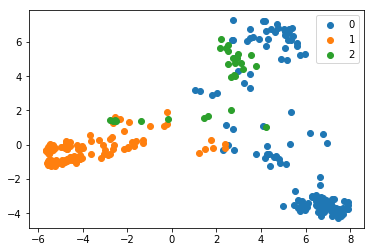

In [24]:
# PCAで2次元に次元削減
pca = PCA(n_components=2)
pca.fit(np.array(X))
X_2d = pca.fit_transform(np.array(X))
%matplotlib inline
for yl in set(Y):
    indices = [y == yl  for y in Y]
    points = X_2d[indices]
    plt.scatter(points[:, 0], points[:, 1], label=str(yl))
    
plt.legend()
plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
clf = LogisticRegression()
cross_validation.cross_val_score(clf, X, Y, cv=5)

/home/nakamura/.pyenv/versions/anaconda3-4.4.0/envs/detection_server/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


array([ 0.83783784,  0.98648649,  1.        ,  1.        ,  0.92957746])

In [46]:
from imgaug import augmenters as iaa
    
seq = iaa.Sequential([
    iaa.Crop(percent=(0, 0.1)), # random crops
    iaa.Grayscale(alpha=1.0),
    iaa.ContrastNormalization((0.1, 0.9)),
    iaa.Add((-50, 50), True),
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-25, 25),
        shear=(-8, 8)
    )
], random_order=True)

def augment_images(img_batch, times):
    images = []
    for i in range(times):
#         print("{}/{}".format(i, times))
        images_aug = seq.augment_images(img_batch)
        images.extend(images_aug)
        
    return images


In [71]:
from sklearn.model_selection import train_test_split
data_train, data_test, l_train, l_test = train_test_split(data, labels, test_size=0.3, random_state=7)

In [77]:
len(data_train), len(l_train), len(data_test), len(l_test)

(254, 254, 109, 109)

In [82]:
np.array(l_test)

array([0, 2, 1, 1, 2, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 1, 1, 1])

In [73]:
X_train = list()
y_train = list()
times = 8
for (d0, d1), label in zip(data_train, l_train) :
    input_image = list()
    
    augs0 = augment_images([np.array(Image.open(app.config['RAW_IMG_DIR'] + d0['filename']))], times)
    features0 = nn.img2vec([Image.fromarray(img) for img in augs0])
    augs1 = augment_images([np.array(Image.open(app.config['RAW_IMG_DIR'] + d1['filename']))], times)
    features1 = nn.img2vec([Image.fromarray(img) for img in augs1])
    
    for f0, f1 in zip(features0, features1):
        X_train.append(np.concatenate((f0, f1)))
        
    for _ in range(times):
        y_train.append(label)

0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8


0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
0/8
1/8


In [74]:
X_test = list()
for d0, d1 in data_test :
    inputd = [Image.open(app.config['RAW_IMG_DIR'] + d0['filename']), Image.open(app.config['RAW_IMG_DIR'] + d1['filename'])]
    features = nn.img2vec(inputd)
    X_test.append(np.concatenate((features[0], features[1])))

y_test = l_test

0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2
0/2
1/2


In [83]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
from sklearn.externals import joblib
joblib.dump(clf, 'clf1103.pkl')

['clf1103.pkl']

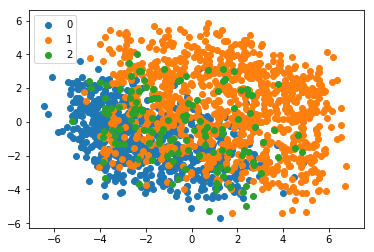

In [54]:
# PCAで2次元に次元削減
pca = PCA(n_components=2)
pca.fit(np.array(X))
X_2d = pca.fit_transform(np.array(X))
%matplotlib inline
for yl in set(Y):
    indices = [y == yl  for y in Y]
    points = X_2d[indices]
    plt.scatter(points[:, 0], points[:, 1], label=str(yl))
    
plt.legend()
plt.show()

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
clf = LogisticRegression()
cross_validation.cross_val_score(clf, X_train, y_train, cv=5)

array([ 0.94594595,  0.94840295,  0.94103194,  0.96305419,  0.95555556])

In [80]:
len(X_train)

2032